In [13]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('books.csv')

In [7]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [8]:
# Check for missing values
missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64


In [9]:
# we can deal with the missing values in different ways we can drop the row that contains the missing value or fill it with the mean
# 1)Drop rows containing any missing value
df.dropna(inplace=True)

In [10]:
# Check for missing values after removing it
missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


In [ ]:
# Now we have a clean data without any missing values

In [11]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [book_id, goodreads_book_id, best_book_id, work_id, books_count, isbn, isbn13, authors, original_publication_year, original_title, title, language_code, average_rating, ratings_count, work_ratings_count, work_text_reviews_count, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5, image_url, small_image_url]
Index: []

[0 rows x 23 columns]


In [ ]:
# so as we see there is no duplicate values

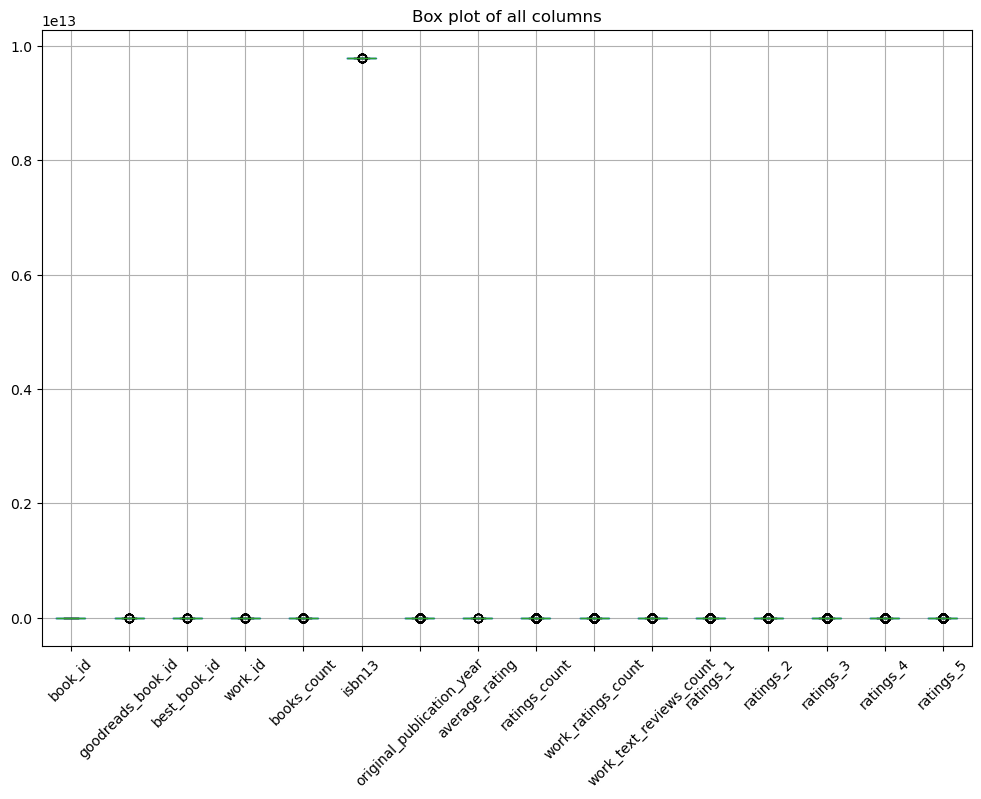

In [14]:
#check for outlires 
# Create a box plot for all columns
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box plot of all columns')
plt.xticks(rotation=45)
plt.show()

In [16]:
# handling the outlires by removing outliers using the interquartile range (IQR) method
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Filter out rows where any numeric value is outside the threshold
df_cleaned = df[~((numeric_cols < (Q1 - threshold * IQR)) | (numeric_cols > (Q3 + threshold * IQR))).any(axis=1)]

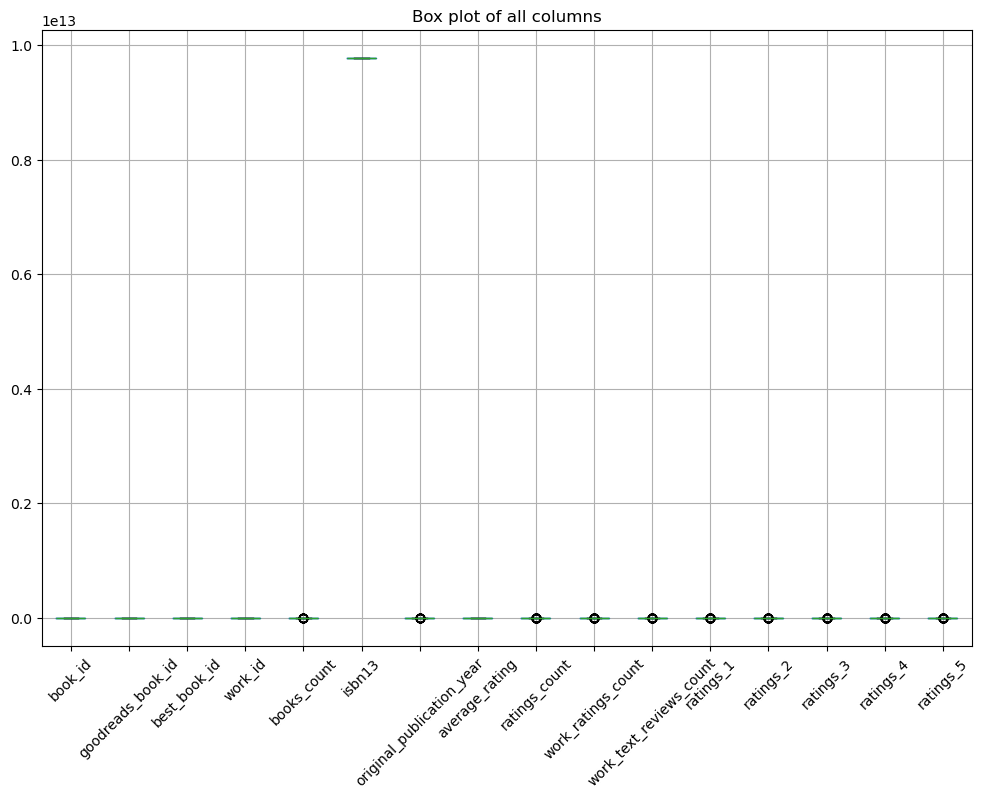

In [17]:
# Create a box plot for all columns
plt.figure(figsize=(12, 8))
df_cleaned.boxplot()
plt.title('Box plot of all columns')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filter the dataset to include only books from the Harry Potter series
harry_potter_books = df[df['title'].str.contains('Harry Potter', case=False)]

In [ ]:
# Now you have a DataFrame containing only the Harry Potter book series

In [19]:
print(harry_potter_books) #some details about harry potter book series

      book_id  goodreads_book_id  best_book_id   work_id  books_count  \
1           2                  3             3   4640799          491   
6          18                  5             5   2402163          376   
8          21                  2             2   2809203          307   
9          23              15881         15881   6231171          398   
10         24                  6             6   3046572          332   
11         25             136251        136251   2963218          263   
12         27                  1             1  41335427          275   
96        422             862041        862041   2962492           76   
613      3753                 10            10  21457570            6   
1036     7018             483445        483445    471792           42   

            isbn        isbn13                                  authors  \
1      439554934  9.780440e+12              J.K. Rowling, Mary GrandPré   
6     043965548X  9.780440e+12  J.K. Rowling, 

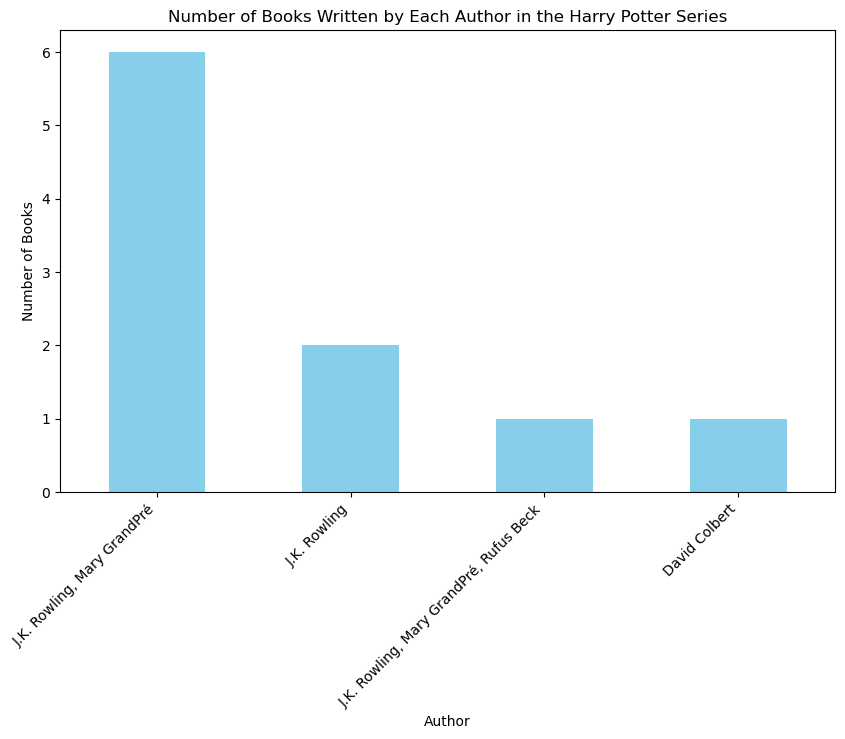

In [25]:
#Authors Analysis: Analyze the number of books written by each author in the Harry Potter series.
# Count the number of books written by each author
author_counts = harry_potter_books['authors'].value_counts()

# Plot the number of books written by each author
plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Number of Books Written by Each Author in the Harry Potter Series')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
# Sort the Harry Potter books by total ratings count in descending order
most_selling_books = harry_potter_books.sort_values(by='work_ratings_count', ascending=False)

# Print the most selling book within the Harry Potter series
most_selling_book = most_selling_books.iloc[0]  # Assuming the first book in the sorted DataFrame has the highest ratings count
print("The most selling book within the Harry Potter series is:")
print(most_selling_book[['title', 'work_ratings_count']])

The most selling book within the Harry Potter series is:
title                 Harry Potter and the Sorcerer's Stone (Harry P...
work_ratings_count                                              4800065
Name: 1, dtype: object


In [23]:
# Calculate the average rating for each book
harry_potter_books['average_rating'] = (harry_potter_books['ratings_1'] * 1 + 
                                        harry_potter_books['ratings_2'] * 2 + 
                                        harry_potter_books['ratings_3'] * 3 + 
                                        harry_potter_books['ratings_4'] * 4 + 
                                        harry_potter_books['ratings_5'] * 5) / harry_potter_books['work_ratings_count']

# Calculate the overall average rating of the Harry Potter series
overall_average_rating = harry_potter_books['average_rating'].mean()
print("The average rating of the Harry Potter books series is:", overall_average_rating)


The average rating of the Harry Potter books series is: 4.490890609929265


/tmp/ipykernel_230/1647894047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harry_potter_books['average_rating'] = (harry_potter_books['ratings_1'] * 1 +
